# Experiment Description

<p> We are going to optimize the instruction prefix used in our manual templates using the gradient-based search. We are going to apply the gradient-based search to find better instructions. </p>

For example: <b>Gradient-Search for Instruction Prefix</b><br><br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>

  - <b>Initial Template:</b><br>
  'Generate the sentiment of the next sentence. I hate watching this movie.'<br>

  - <b>Gradient-Search</b> (based on autoprompt) will only update the instruction tokens "Generate the sentiment of the next sentence."<br>

In [11]:
# define the internal cuda variables for gpu node in the vector's cluster.
!source ./src/reference_implementations/setup_gpu_worker.sh

Hostname: gpu031
Node Rank 0
Using Python from: /ssd003/home/snajafi/codes/PromptEngineering/prompt_torch-env/bin/python


# Experiment on SemEval Sentiment

In [12]:
!rm -r -f "/tmp/gradient_search_experiments/semeval"
!mkdir -p "/tmp/gradient_search_experiments"
!mkdir -p "/tmp/gradient_search_experiments/semeval"

In [13]:
!python -m src.reference_implementations.prompt_zoo.trainer \
    --train_batch_size 24 \
    --eval_batch_size 2048 \
    --mode train \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file ./resources/datasets/2018-Valence-oc-En-train.txt \
    --dev_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/gradient_search_experiments/semeval \
    --prediction_file /tmp/gradient_search_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 1 \
    --training_steps 1000000 \
    --steps_per_checkpoint 2 \
    --beam_size 1 \
    --top_k 40 \

2023-02-15 17:25:11.766710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-15 17:25:11.766812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-15 17:25:11.766885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-15 17:25:11.766952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-15 17:25:11.766986: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

evaluating batch with prompt template: ['negative', 'Determine', 'the', 'neutral', 'consolidation', 'the', 'next', 'sentence', 'neutral']
Epoch: 0 | Batch: 41 | Mean Loss: 16.948895268323945 | Epoch Loss: 16.948895268323945 | Loss: 16.961156845092773

Epoch: 0 | Batch: 42 | Mean Loss: 16.928381851741246 | Epoch Loss: 16.928381851741246 | Loss: 16.087331771850586

evaluating batch with prompt template: ['negative', 'Determine', 'the', 'neutral', 'couvrir', 'the', 'next', 'Printer', 'positive']
Epoch: 0 | Batch: 43 | Mean Loss: 16.90022138107655 | Epoch Loss: 16.90022138107655 | Loss: 15.71748161315918

Epoch: 0 | Batch: 44 | Mean Loss: 16.88050289587541 | Epoch Loss: 16.88050289587541 | Loss: 16.032608032226562

evaluating batch with prompt template: ['negative', 'Everyone', 'the', 'neutral', 'couvrir', 'the', 'next', 'sentence', 'neutral']
Epoch: 0 | Batch: 45 | Mean Loss: 16.863856315612793 | Epoch Loss: 16.863856315612793 | Loss: 16.131406784057617

Epoch: 0 | Batch: 46 | Mean Loss: 

In [14]:
# test with the best saved prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/gradient_search_experiments/semeval \
    --prediction_file /tmp/gradient_search_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-02-15 17:38:09.181240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-15 17:38:09.181341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-15 17:38:09.181413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-15 17:38:09.181481: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-15 17:38:09.181514: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [4]:
# You can also run the tensorboard from the node to monitor training status as we are training with gradient-search.
!tensorboard --logdir=/tmp/gradient_search_experiments/semeval --bind_all

2023-02-14 17:52:04.478173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:52:04.478205: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-14 17:52:06.000140: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:52:06.038419: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:52:06.039802: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

# Gradient Search Result on SemEval
We see that the gradient-based search could find the following optimal prompt tokens instead of "Generate the sentiment of the next sentence."

['negative', 'Determine', 'the', 'neutral', 'couvrir', 'the', 'next', 'sentence', 'neutral']

The new template increase the performance to 61.25% accuracy from 58.13% with the original instruction.

The new prompt has 'negative', 'neutral' labels!

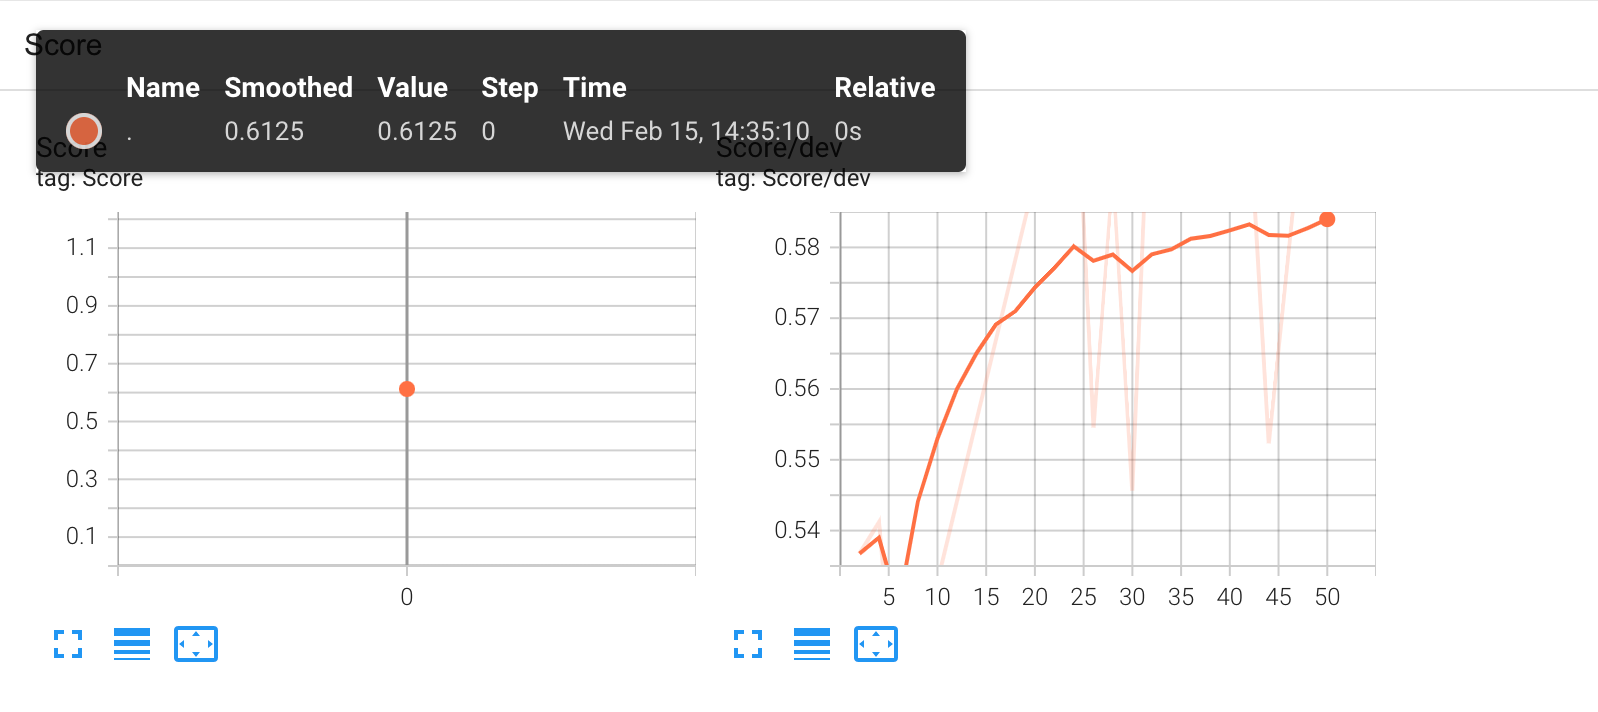

# Experiments on SST-2 Binary Sentiment Classification Task

Similar to SemEval, we can gradient-search to further optimize the instruction at the start on the SST-2 dataset.

In [15]:
!rm -r -f "/tmp/gradient_search_experiments/sst2"
!mkdir -p "/tmp/gradient_search_experiments"
!mkdir -p "/tmp/gradient_search_experiments/sst2"

In [17]:
# Search only for 100 training steps!
!python -m src.reference_implementations.prompt_zoo.trainer \
    --train_batch_size 24 \
    --eval_batch_size 1024 \
    --mode train \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path /tmp/gradient_search_experiments/sst2 \
    --prediction_file /tmp/gradient_search_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 1 \
    --training_steps 100 \
    --steps_per_checkpoint 2 \
    --beam_size 1 \
    --top_k 40 \

2023-02-15 17:41:26.538563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-15 17:41:26.538676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-15 17:41:26.538746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-15 17:41:26.538815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-15 17:41:26.538850: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

W0215 17:45:52.669992 139960946081920 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0215 17:45:52.674381 139960946081920 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 15 | Mean Loss: 15.517301432291667 | Epoch Loss: 15.517301432291667 | Loss: 15.490050315856934

Epoch: 0 | Batch: 16 | Mean Loss: 15.427761495113373 | Epoch Loss: 15.427761495113373 | Loss: 14.084662437438965

evaluating batch with prompt template: ['positive', 'cedent', 'Quarry', 'Positive', 'of', 'the', 'next', 'sentence', 'indirect']
evaluating batch with prompt template: ['positive', 'cedent', 'Quarry', 'Positive', 'of', 'the', 'next', 'sentence', 'indirect']
W0215 17:46:24.748272 139960946081920 builder.py:785] Found 

evaluating batch with prompt template: ['positive', 'cedent', 'Quarry', 'Positive', 'of', 'sandy', 'next', 'sentence', '.']
W0215 17:50:45.709149 139960946081920 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0215 17:50:45.713648 139960946081920 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 33 | Mean Loss: 15.18690115032774 | Epoch Loss: 15.18690115032774 | Loss: 14.571612358093262

Epoch: 0 | Batch: 34 | Mean Loss: 15.166296790627872 | Epoch Loss: 15.166296790627872 | Loss: 14.486352920532227

evaluating batch with prompt template: ['positive', 'concasseur', 'Quarry', 'negative', 'of', 'the', 'next', 'sentence', '.']
evaluating batch with prompt template: ['positive', 'concasseur', 'Qua

evaluating batch with prompt template: ['positive', 'Inhalt', 'Quarry', 'Positive', 'of', 'the', 'next', 'sentence', '.']
evaluating batch with prompt template: ['positive', 'Inhalt', 'Quarry', 'Positive', 'of', 'the', 'next', 'sentence', '.']
W0215 17:55:37.750421 139960946081920 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0215 17:55:37.754658 139960946081920 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 51 | Mean Loss: 15.063907024907131 | Epoch Loss: 15.063907024907131 | Loss: 14.90073013305664

Epoch: 0 | Batch: 52 | Mean Loss: 15.070755279981173 | Epoch Loss: 15.070755279981173 | Loss: 15.420016288757324

evaluating batch with prompt template: ['negative', 'cedent', 'Quarry', 'ne

Epoch: 0 | Batch: 68 | Mean Loss: 15.02495539889616 | Epoch Loss: 15.02495539889616 | Loss: 14.736834526062012

evaluating batch with prompt template: ['positive', 'cedent', 'Resume', 'negative', 'of', 'the', 'next', 'sentence', 'considerare']
evaluating batch with prompt template: ['positive', 'cedent', 'Resume', 'negative', 'of', 'the', 'next', 'sentence', 'considerare']
W0215 18:00:30.214538 139960946081920 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0215 18:00:30.219033 139960946081920 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 69 | Mean Loss: 15.016306199889252 | Epoch Loss: 15.016306199889252 | Loss: 14.428160667419434

Epoch: 0 | Batch: 70 | Mean Loss: 15.017281804765974 | E

Epoch: 0 | Batch: 85 | Mean Loss: 14.782354893403895 | Epoch Loss: 14.782354893403895 | Loss: 12.906257629394531

Epoch: 0 | Batch: 86 | Mean Loss: 14.768641405327376 | Epoch Loss: 14.768641405327376 | Loss: 13.602994918823242

evaluating batch with prompt template: ['positive', 'cedent', 'Resume', 'negative', 'of', 'the', 'ERA', 'positiv', '.']
evaluating batch with prompt template: ['positive', 'cedent', 'Resume', 'negative', 'of', 'the', 'ERA', 'positiv', '.']
W0215 18:05:21.182517 139960946081920 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0215 18:05:21.188580 139960946081920 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
Epoch: 0 | Batch: 87 | Mean Loss: 14.762985865275065 | Epoch Loss: 14.76298586

In [18]:
# test on sst2
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path /tmp/gradient_search_experiments/sst2 \
    --prediction_file /tmp/gradient_search_experiments/sst2/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-02-15 18:20:15.235098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-15 18:20:15.235210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-15 18:20:15.235281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-15 18:20:15.235357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-15 18:20:15.235394: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [19]:
# re-launch the tensorboard to view the updated results with sst2
!tensorboard --logdir=/tmp/gradient_search_experiments/ --bind_all

2023-02-15 18:21:04.266873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-15 18:21:04.266906: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-15 18:21:05.878015: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-15 18:21:05.920363: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-15 18:21:05.921823: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

# Results from SST2

As seen in the prediction, the instruction template ['positive', 'cedent', 'Resume', 'negative', 'of', 'the', 'ERA', 'positiv', '.'] acheives 74.08% accuracy on the sst2 dev set while the original template "Generate the sentiment of the next sentence." acheives 68%! 


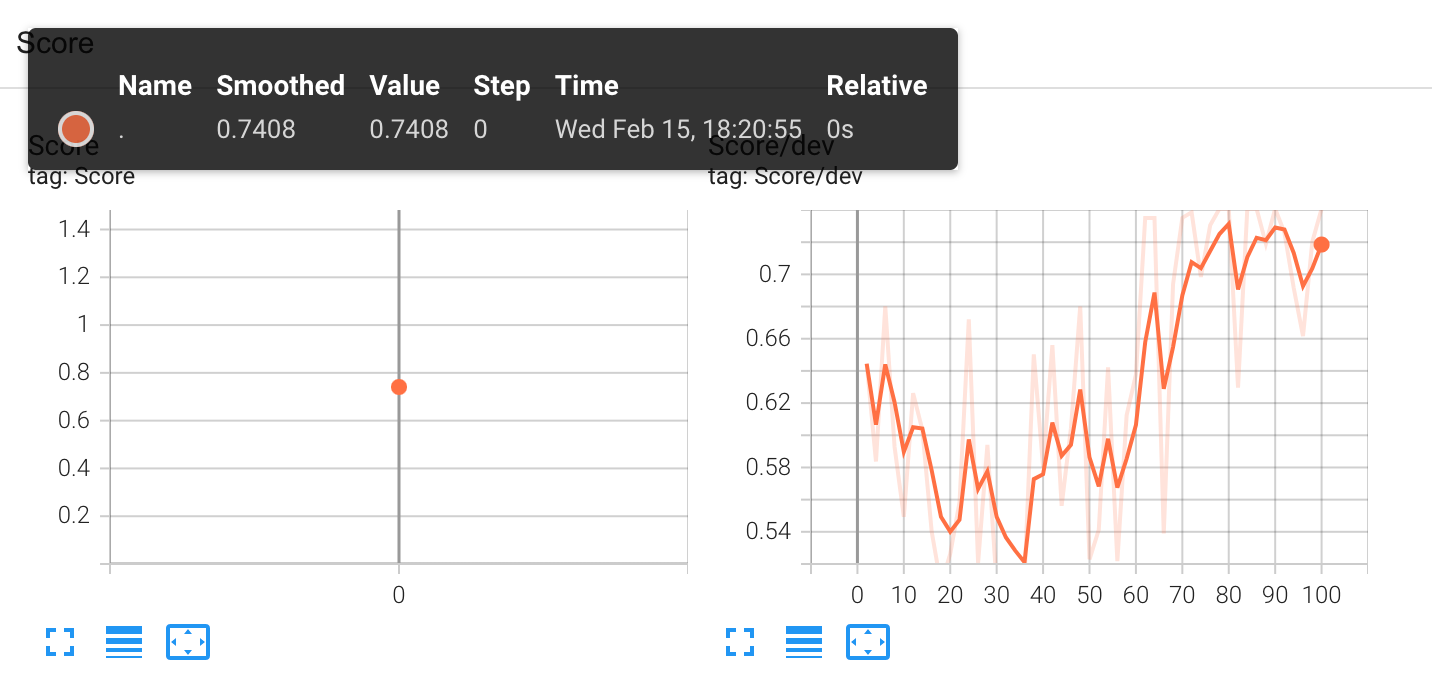

# Longer Training With Gradient-Search on SemEval and SST-2 datasets.

In [1]:
"""Using the Vector's Cluster and the Slurm scheduler, we can submit the following longer training jobs on
SemEval and SST-2 datasets.
"""
# uncomment and run the following script.
# !bash ./train_scripts/run_sentiment_experiments_gradient_search.sh

"Using the Vector's Cluster and the Slurm scheduler, we can submit the following longer training jobs on\nSemEval and SST-2 datasets.\n"

With longer training, we can further improve the result on semeval dataset to 62.14% accuracy!

In [3]:
# test on semeval using the model trained longer.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /scratch/ssd004/scratch/snajafi/data_temp/torch-prompt/gradient_search/semval \
    --prediction_file /scratch/ssd004/scratch/snajafi/data_temp/torch-prompt/gradient_search/semval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-02-15 22:46:17.298974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-15 22:46:17.299088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-15 22:46:17.299166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-15 22:46:17.299240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-15 22:46:17.299275: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Longer Results on SemEval
Searched Template:
['negative', 'Determine', 'the', 'neutral', 'couvrir', 'the', 'Buzz', 'sentence', 'neutral']

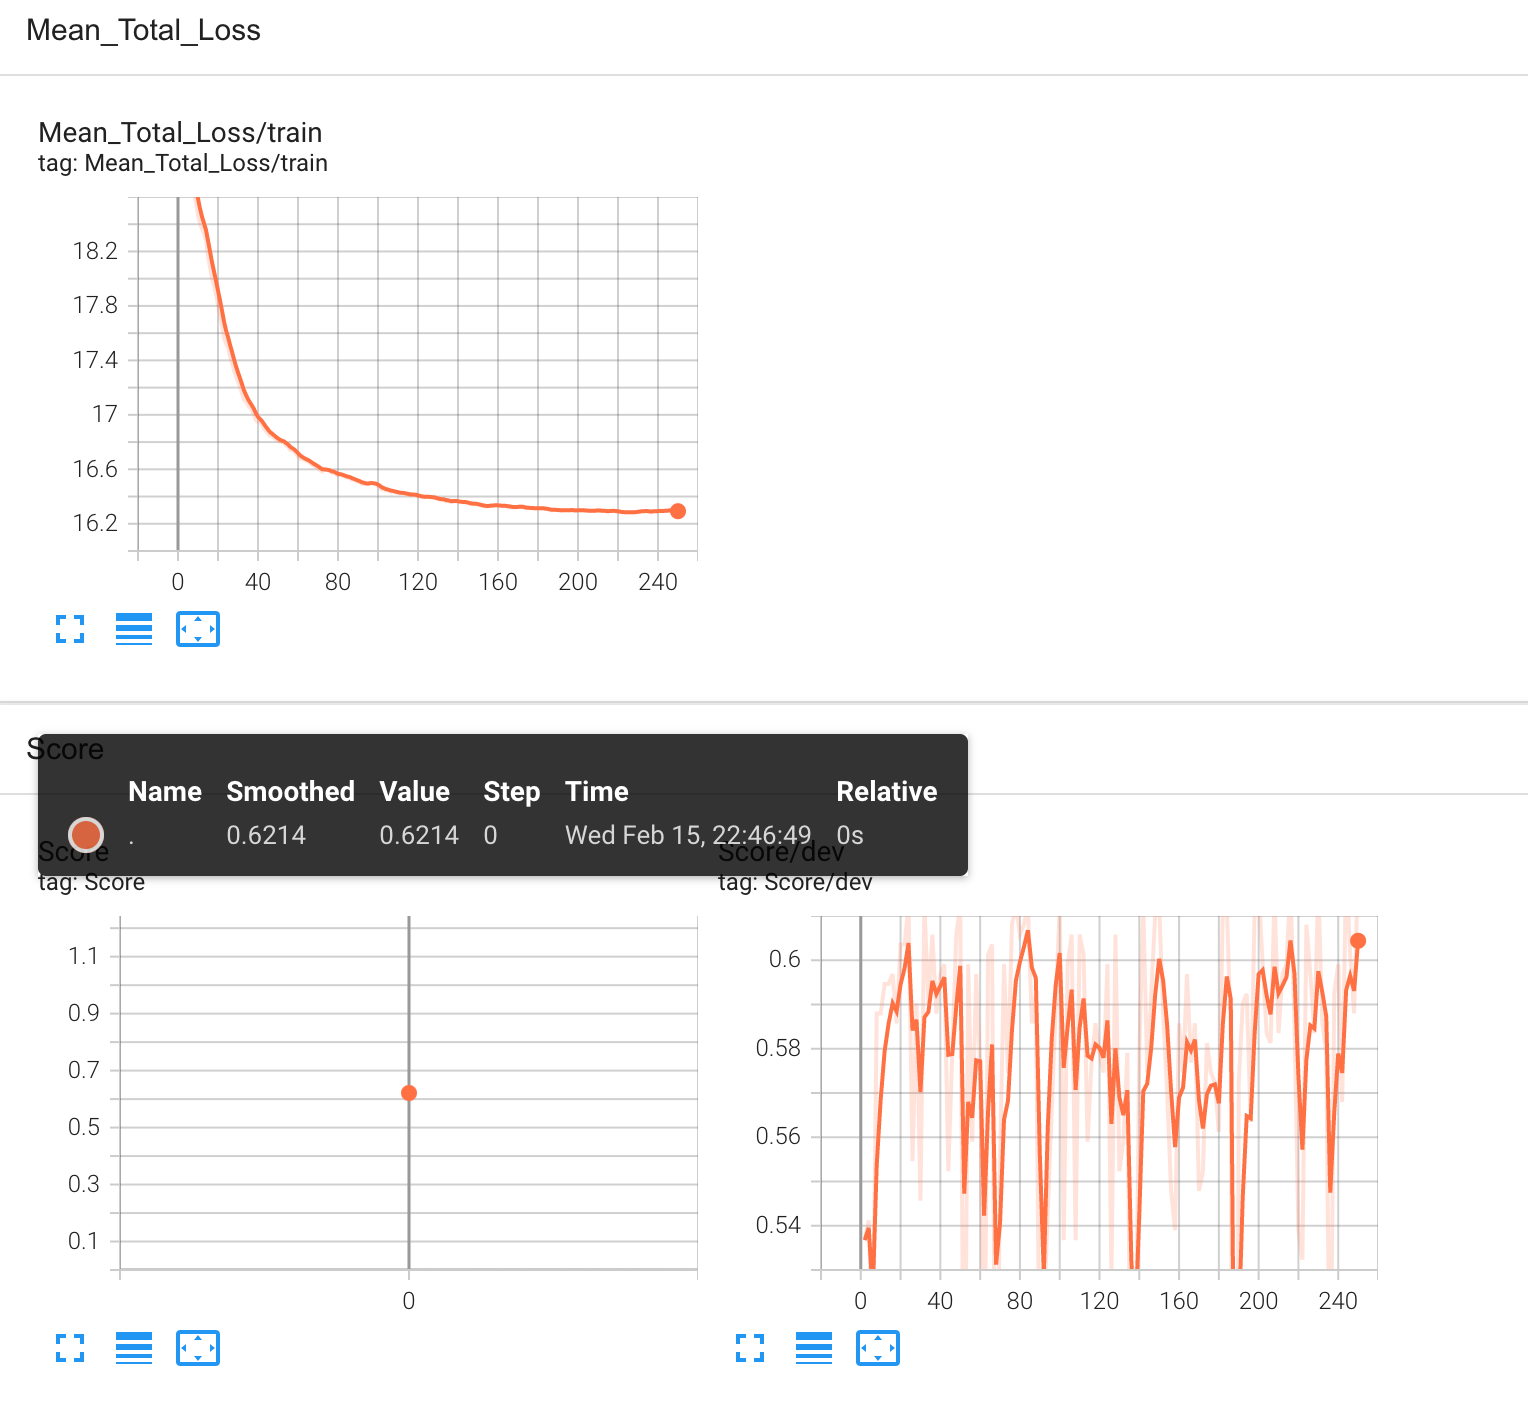

In [4]:
# test on sst2 using the model trained longer.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path /scratch/ssd004/scratch/snajafi/data_temp/torch-prompt/gradient_search/sst2 \
    --prediction_file /scratch/ssd004/scratch/snajafi/data_temp/torch-prompt/gradient_search/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-02-15 22:55:11.766297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-15 22:55:11.766395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-15 22:55:11.766464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-15 22:55:11.766530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-15 22:55:11.766564: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Longer Results on SST-2
Searched Template:
['positive', 'Background', 'Resume', 'negative', 'Plymouth', 'Trim', 'Parfum', 'positive', 'Miracle']

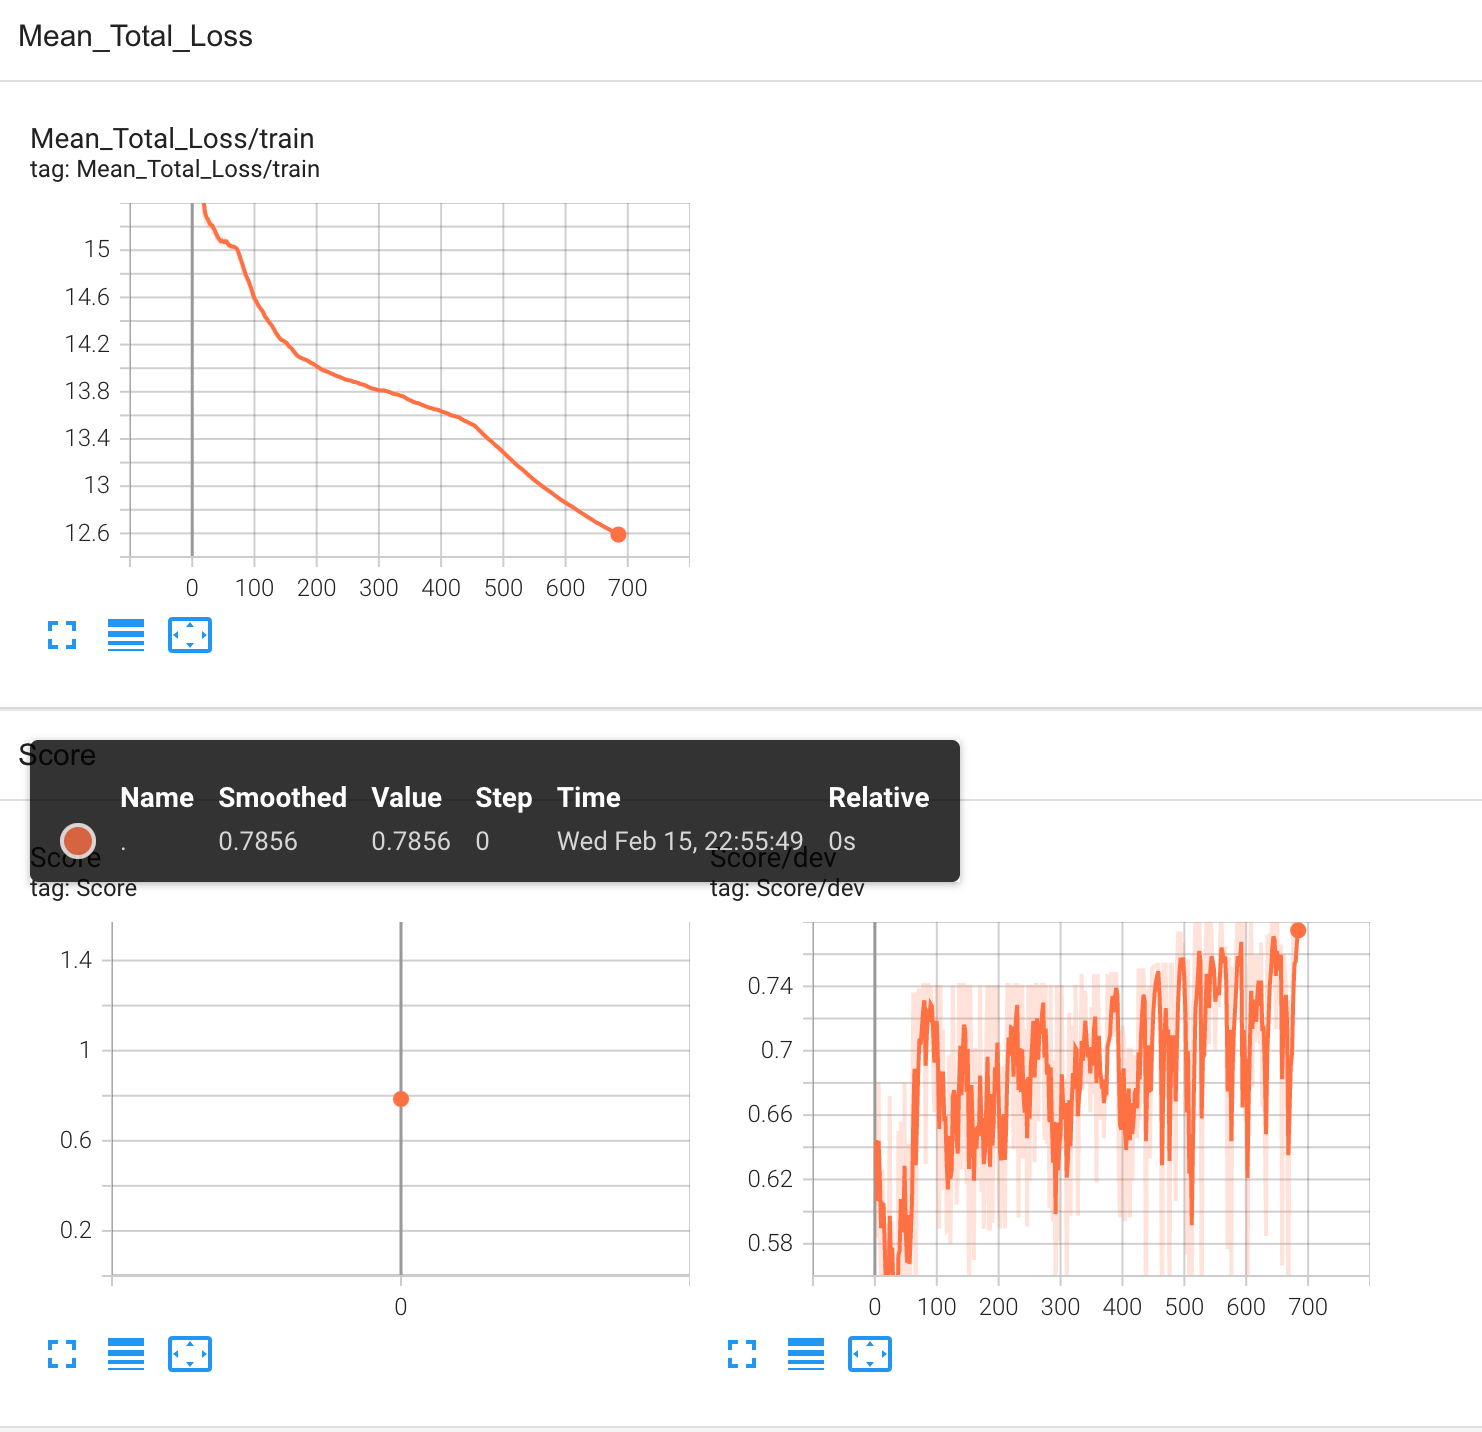